<a href="https://colab.research.google.com/github/raichalvarghese/Data_Science_Lab/blob/master/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [21]:
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG


%matplotlib inline

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)


# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)


"""Build and train neural network"""

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))




Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]
Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.3220 - accuracy: 0.9013 - val_loss: 0.1229 - val_accuracy: 0.9619
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1569 - accuracy: 0.9530 - val_loss: 0.0915 - val_accuracy: 0.9731
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1215 - accuracy: 0.9640 - val_loss: 0.0842 - val_accuracy: 0.9752
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1058 - accuracy: 0.9696 - val_loss: 0.0833 - val_accuracy: 0.9774
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0979 - accuracy: 0.9711 - val_loss: 0.0769 - val_accuracy: 0.9794
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0904 - accuracy: 0.9739 - val_loss: 0.0766 - val_accuracy: 0.9792
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0842 - accuracy: 0.9757 - val_loss: 0.0772 - val_accuracy: 0.9798

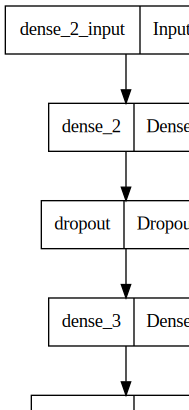

In [23]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


"""Summarize and visualize the model"""

# Summary of neural network
model.summary()

# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))